# Importing libraries


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("copper.csv")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df1 = df.copy()

In [4]:
df1.shape

(181673, 14)

In [5]:
df1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

# Dealing data with wrong format

In [6]:
df1['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df1['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df1['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df1['country'] = pd.to_numeric(df['country'], errors='coerce')
df1['application'] = pd.to_numeric(df['application'], errors='coerce')
df1['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df1['width'] = pd.to_numeric(df['width'], errors='coerce')
df1['material_ref'] = df['material_ref'].str.lstrip('0')
df1['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df1['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df1['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')


# Exploratory data analysis

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [8]:
df1.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [9]:
df1.material_ref.fillna('unknown', inplace=True)
df1 = df1.dropna()

In [10]:
# df.item_date.fillna(df.item_date.mode(), inplace=True) 
df1['quantity tons'].fillna(df1['quantity tons'].mean(), inplace=True)
df1.customer.fillna(df1.customer.mean(), inplace=True)
df1.country.fillna(df1.country.median(), inplace=True)
# df.status.fillna(df.status.mode(), inplace=True)
df1.application.fillna(df1.application.mean(), inplace=True)
df1.thickness.fillna(df1.thickness.mean(), inplace=True)
df1.selling_price.fillna(df1.selling_price.mean(),inplace=True)

In [11]:
a = df1['selling_price'] <= 0
print(a.sum())
df1.loc[a, 'selling_price'] = np.nan

a = df1['quantity tons'] <= 0
print(a.sum())
df1.loc[a, 'quantity tons'] = np.nan

a = df1['thickness'] <= 0
print(a.sum())

7
4
0


In [12]:
df1.isna().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

# Treating outliers Before And After

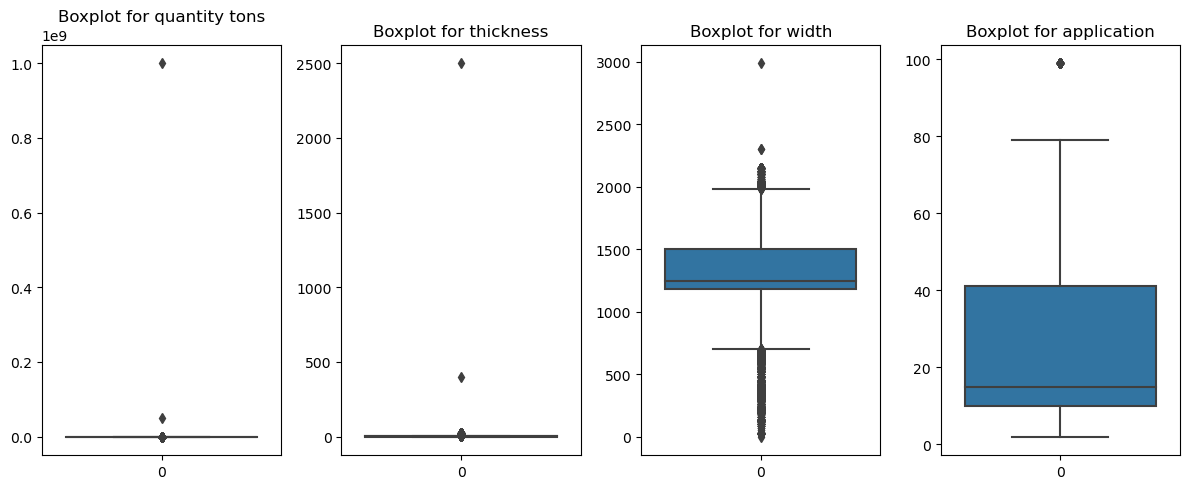

In [13]:
# BEFORE DROPPING OUTLIERS

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))

# Plot for col1
sns.boxplot(df1['quantity tons'], ax=axes[0])
axes[0].set_title(f'Boxplot for {"quantity tons"}')

# Plot for col2
sns.boxplot(df1['thickness'], ax=axes[1])
axes[1].set_title(f'Boxplot for {"thickness"}')

# Plot for col3
sns.boxplot(df1['width'], ax=axes[2])
axes[2].set_title(f'Boxplot for {"width"}')

# Plot for col4
sns.boxplot(df1['application'], ax=axes[3])
axes[3].set_title(f'Boxplot for {"application"}')


# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [14]:
def remove_outliers(df, column_name):
    q1 = df1[column_name].quantile(0.25)
    q3 = df1[column_name].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - 1.5 * iqr
    high_bound = q3 + 1.5 * iqr
    outliers = (df1[column_name] < low_bound) | (df1[column_name] > high_bound)
    outlier_indices = df1[outliers].index.tolist()
    df1.drop(outlier_indices, inplace = True)
     

In [15]:
remove_outliers(df1, 'application')
remove_outliers(df1, 'width')
remove_outliers(df1, 'thickness')
remove_outliers(df1, 'quantity tons')
     

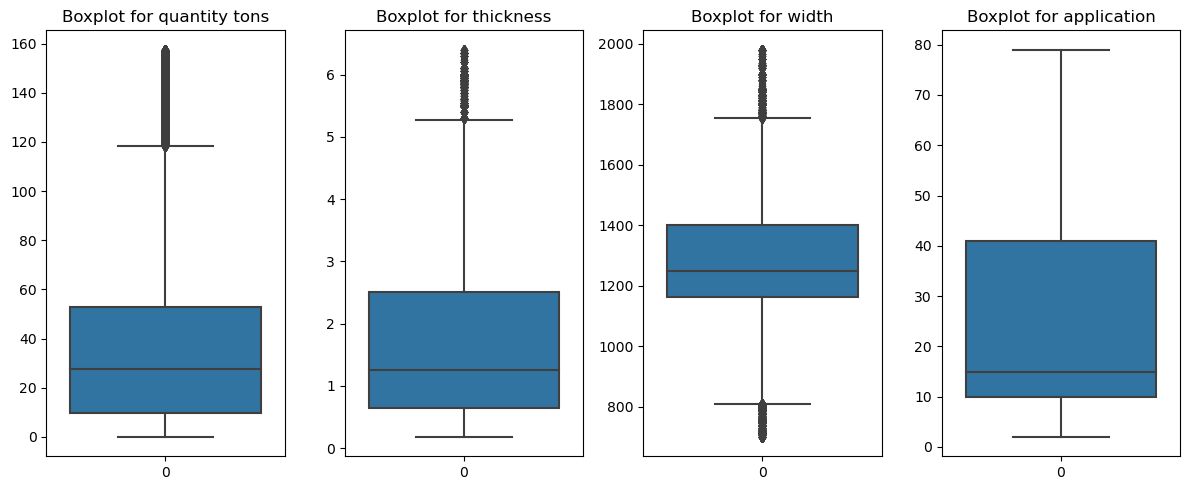

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))


# Plot for col1
sns.boxplot(df1['quantity tons'], ax=axes[0])
axes[0].set_title(f'Boxplot for {"quantity tons"}')

# Plot for col2
sns.boxplot(df1['thickness'], ax=axes[1])
axes[1].set_title(f'Boxplot for {"thickness"}')

# Plot for col3
sns.boxplot(df1['width'], ax=axes[2])
axes[2].set_title(f'Boxplot for {"width"}')

# Plot for col4
sns.boxplot(df1['application'], ax=axes[3])
axes[3].set_title(f'Boxplot for {"application"}')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [17]:
dfr = df1.copy()

Skewness before transformation:
thickness          1.289054
quantity tons      1.376931
selling_price    266.421370
dtype: float64
Skewness after transformation:
thickness_log        0.210626
quantity tons_log   -0.918754
selling_price_log   -5.202328
dtype: float64


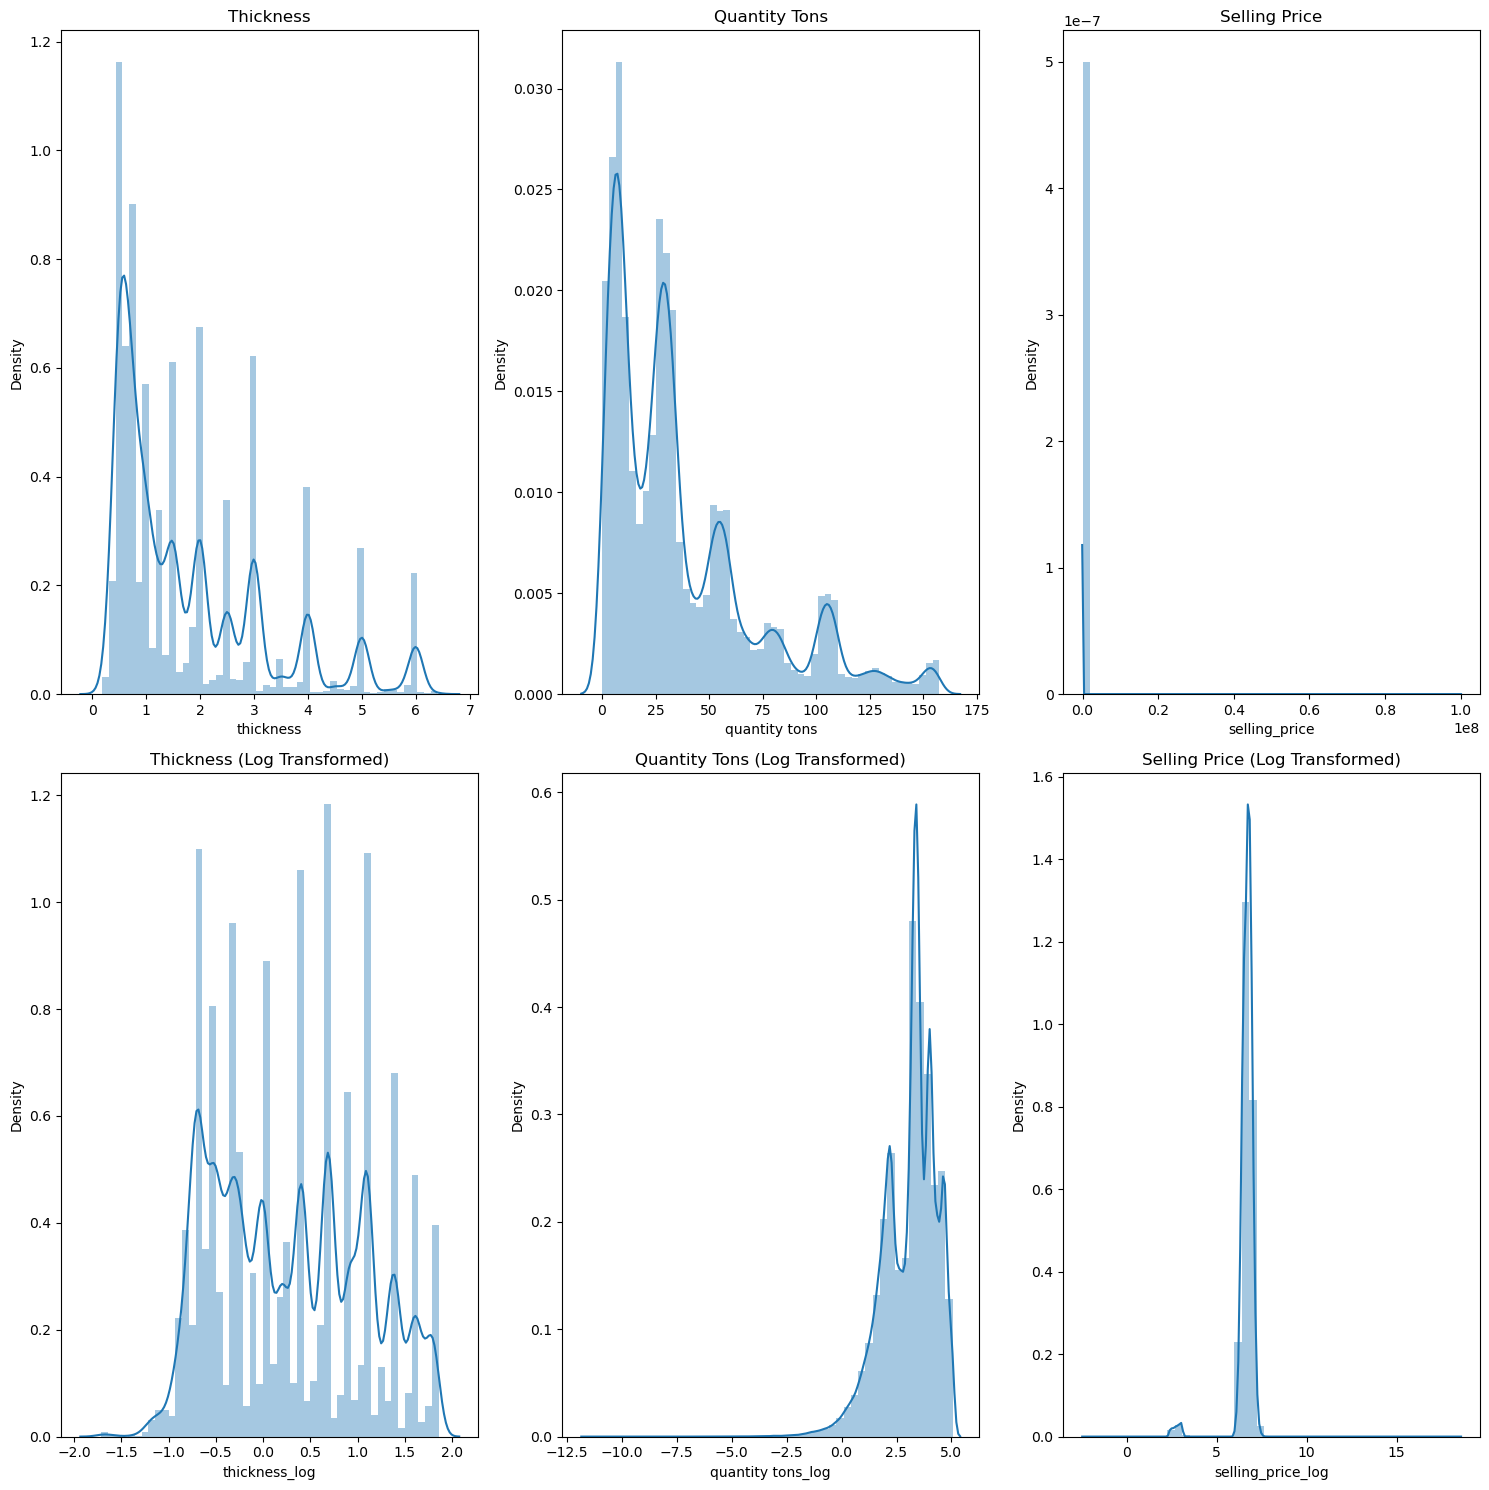

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

skew_before = dfr[['thickness', 'quantity tons', 'selling_price']].skew()
print("Skewness before transformation:")
print(skew_before)

sns.distplot(dfr['thickness'], ax=axes[0, 0])
axes[0, 0].set_title('Thickness')

sns.distplot(dfr['quantity tons'], ax=axes[0, 1])
axes[0, 1].set_title('Quantity Tons')

sns.distplot(dfr['selling_price'], ax=axes[0, 2])
axes[0, 2].set_title('Selling Price')

dfr['thickness_log'] = np.log(dfr['thickness'])
sns.distplot(dfr['thickness_log'], ax=axes[1, 0])
axes[1, 0].set_title('Thickness (Log Transformed)')

dfr['quantity tons_log'] = np.log(dfr['quantity tons'])
sns.distplot(dfr['quantity tons_log'], ax=axes[1, 1])
axes[1, 1].set_title('Quantity Tons (Log Transformed)')

dfr['selling_price_log'] = np.log(dfr['selling_price'])
sns.distplot(dfr['selling_price_log'], ax=axes[1, 2])
axes[1, 2].set_title('Selling Price (Log Transformed)')


skew_after = dfr[['thickness_log', 'quantity tons_log', 'selling_price_log']].skew()
print("Skewness after transformation:")
print(skew_after)

# Adjust layout
plt.tight_layout()

plt.show()

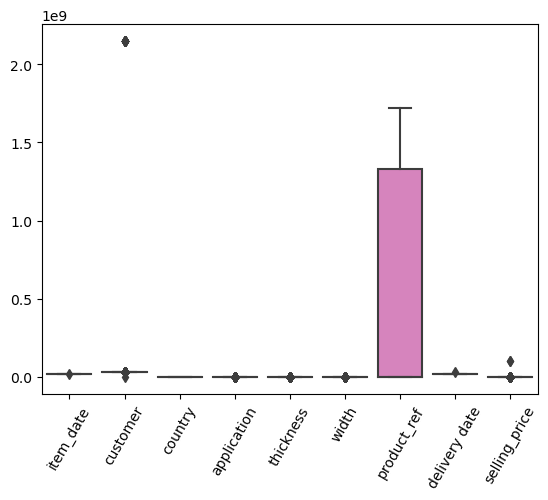

In [19]:
ax=sns.boxplot(data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

In [20]:
x=dfr[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

<Axes: >

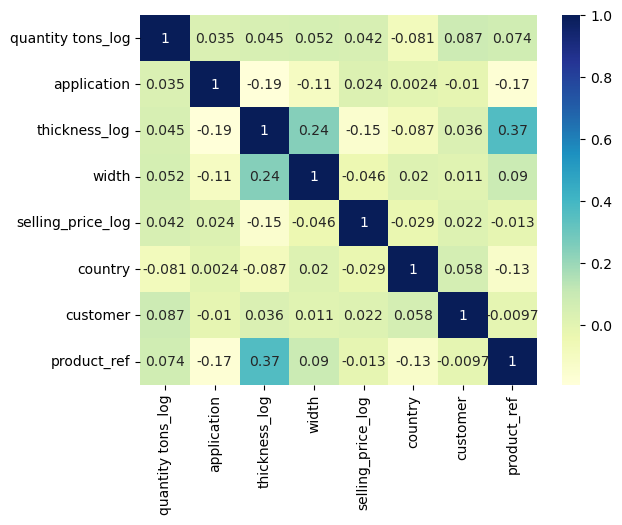

In [21]:
sns.heatmap(x, annot=True, cmap="YlGnBu")

In [22]:
dfr['country'] = dfr['country'].astype(str)
country=dfr['country'].unique()
status=dfr['status'].unique()
item=dfr['item type'].unique()
print(country)
print(status)
print(item)

['28.0' '30.0' '32.0' '38.0' '78.0' '27.0' '25.0' '77.0' '79.0' '39.0'
 '40.0' '84.0' '26.0' '80.0' '113.0' '107.0' '89.0']
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'S' 'Others' 'PL' 'WI' 'IPL']


In [23]:
#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [110]:
# from sklearn.preprocessing import OrdinalEncoder
# OE = OrdinalEncoder()
# dfr.status = OE.fit_transform(dfr[['status']])
# dfr['item type'] = OE.fit_transform(dfr[['item type']])

In [24]:
dfr = dfr.dropna()

In [25]:
# X=dfr[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
# y=dfr['selling_price_log']

In [26]:
# from sklearn.preprocessing import StandardScaler
# SS = StandardScaler()
# SS.fit_transform(X)

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols = ['status', 'item type', 'application', 'country', 'customer', 'product_ref']
numerical_cols = ['quantity tons_log', 'thickness_log', 'width']

# Applying OneHotEncoder to categorical columns
ohe = OneHotEncoder(handle_unknown='ignore')
X_cat = ohe.fit_transform(dfr[categorical_cols])

# Scaling numerical columns
scaler = StandardScaler()
X_num = scaler.fit_transform(dfr[numerical_cols])

# Concatenating encoded categorical and scaled numerical features
X = pd.concat([pd.DataFrame(X_cat.toarray(), columns=ohe.get_feature_names_out(categorical_cols)),
               pd.DataFrame(X_num, columns=numerical_cols)], axis=1)

# target variable
y = dfr['selling_price_log']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(99372, 1184)
(42588, 1184)
(99372,)
(42588,)


In [29]:
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.8946394381510714
0.8887978154389291


In [30]:
gbr = GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.1, random_state =42)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.7821658071107558
0.7781292118711293


In [31]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
print(dtr.score(X_train,y_train))
print(dtr.score(X_test,y_test))

1.0
0.8919621013034924


In [32]:
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [33]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

Mean squared error: 0.03879000204609
Mean absolute error: 0.1565771575522006
R-squared: 0.8903388028372913


In [34]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ohe.pkl', 'wb') as f:
    pickle.dump(ohe, f)


In [34]:
dfr.shape

(141960, 17)

In [59]:
obj = pd.read_pickle(r'model.pkl')
obj

DecisionTreeRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10)

In [60]:
obj = pd.read_pickle(r'scaler.pkl')
obj

StandardScaler()

In [37]:
obj = pd.read_pickle(r'ohe.pkl')
obj

OneHotEncoder(handle_unknown='ignore')

In [61]:
dfr.status.value_counts()

status
Won                92797
Lost               24372
Not lost for AM    15221
To be approved      3394
Revised             3358
Draft               2755
Offered               52
Offerable             10
Wonderful              1
Name: count, dtype: int64

In [62]:
dfc = dfr.copy()

In [63]:
dfc = dfr[dfr['status'].isin(['Won', 'Lost'])]
dfc.head()
len(dfc)

117169

In [64]:
dfc.status.value_counts()

status
Won     92797
Lost    24372
Name: count, dtype: int64

In [65]:
# categorical_cols = ['status', 'item type', 'application', 'country', 'customer', 'product_ref']
# numerical_cols = ['quantity tons_log', 'thickness_log', 'width']

# # Applying OneHotEncoder to categorical columns
# ohe = OneHotEncoder(handle_unknown='ignore')
# X_cat1 = ohe.fit_transform(dfr[categorical_cols])

# # Scaling numerical columns
# scaler = StandardScaler()
# X_num1 = scaler.fit_transform(dfr[numerical_cols])

# # Concatenating encoded categorical and scaled numerical features
# X = pd.concat([pd.DataFrame(X_cat.toarray(), columns=ohe.get_feature_names_out(categorical_cols)),
#                pd.DataFrame(X_num, columns=numerical_cols)], axis=1)

# # target variable
# y = dfc['status']

In [66]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
dfc.status = OE.fit_transform(dfc[['status']])
dfc['item type'] = OE.fit_transform(dfc[['item type']])
dfc['country'] = OE.fit_transform(dfc[['country']])


In [67]:
X = dfc[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = dfc['status']

In [68]:
SS = StandardScaler()
SS.fit_transform(X)


array([[ 0.50993997,  0.02643972,  0.70587415, ..., -0.5098753 ,
        -0.64670124,  1.6786822 ],
       [ 2.22764262,  0.27251395,  0.70587415, ..., -0.04007214,
         0.99828707, -0.66807451],
       [ 0.94260518,  1.65308623, -1.12582183, ...,  0.19482944,
         0.99152602,  1.67573517],
       ...,
       [ 2.03614742, -0.77889411,  0.70587415, ..., -1.21458003,
        -0.25248953, -0.4383013 ],
       [ 1.9114322 , -0.81404757,  0.70587415, ..., -1.21458003,
        -0.25248953, -0.4383013 ],
       [-0.93749209, -0.72456603,  0.70587415, ..., -1.21458003,
        -0.25248953, -0.4383013 ]])

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(82018, 9)
(35151, 9)
(82018,)
(35151,)


In [70]:
dfc.shape

(117169, 17)

In [71]:
from sklearn.linear_model import LogisticRegression
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier


In [72]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.7925089614474872
0.7907883132770049


In [73]:
xgb_model = XGBClassifier(objective="binary:logistic",random_state=42) 

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

print(xgb_model.score(X_train,y_train))
print(xgb_model.score(X_test,y_test))
# # Evaluate the model's performance on the training data
# train_score = xgb_model.score(X_train, y_train)
# print("Training accuracy score:", train_score)

0.9219683484113244
0.900287331797104


In [74]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [91]:
clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9258342579158487


In [76]:
y_predict = xgb_model.predict(X_test)

In [79]:
y_predict1 = clf.predict(X_test)

In [80]:
y_predict1

array([1., 0., 1., ..., 1., 1., 0.])

In [77]:
y_predict


array([1, 0, 1, ..., 1, 1, 0])

In [81]:
mean_squared_error(y_test, y_predict1)

0.07416574208415123

In [55]:
X_train

,quantity tons,selling_price,item type,application,thickness,width,country,customer,product_ref
98378,103.960738,695.0,3.0,10.0,3.00,1250.0,27.0,30202362.0,628377
84333,3.649375,971.0,4.0,10.0,0.60,1250.0,32.0,30205658.0,611993
177689,60.021906,629.5,3.0,10.0,4.00,1350.0,26.0,30197271.0,164141591
103815,4.248171,724.0,4.0,10.0,1.25,1250.0,78.0,30165529.0,164141591
126615,25.844823,684.0,3.0,65.0,2.00,1459.0,78.0,30349303.0,1668701718
...,...,...,...,...,...,...,...,...,...
8072,105.729404,1190.0,3.0,41.0,0.43,1158.0,27.0,30166521.0,611993
156240,34.823406,710.0,3.0,29.0,1.50,1250.0,84.0,30406632.0,1693867550
31204,8.038841,942.0,4.0,10.0,0.90,1250.0,25.0,30205825.0,1332077137
27994,155.109344,813.0,3.0,41.0,1.50,1200.0,27.0,30297329.0,640665


In [87]:
dfc['country'].value_counts()

country
11.0    22660
1.0     16390
2.0     15658
6.0     13419
4.0     10478
3.0     10327
14.0     8595
5.0      6982
10.0     6707
8.0      2011
12.0     1110
7.0       948
9.0       894
0.0       521
13.0      403
15.0       66
Name: count, dtype: int64

In [86]:
dfr['country'].unique()

array(['28.0', '30.0', '32.0', '38.0', '78.0', '27.0', '25.0', '77.0',
       '79.0', '39.0', '40.0', '84.0', '26.0', '80.0', '113.0', '107.0',
       '89.0'], dtype=object)

In [96]:
df['product_ref'].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642], dtype=int64)

In [101]:
dfr['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [103]:
dfr['item type'].unique()

array(['W', 'S', 'Others', 'PL', 'WI', 'IPL'], dtype=object)

In [88]:
df['country'].unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.,  nan])

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict1)
cm

array([[ 5954,  1400],
       [ 1207, 26590]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

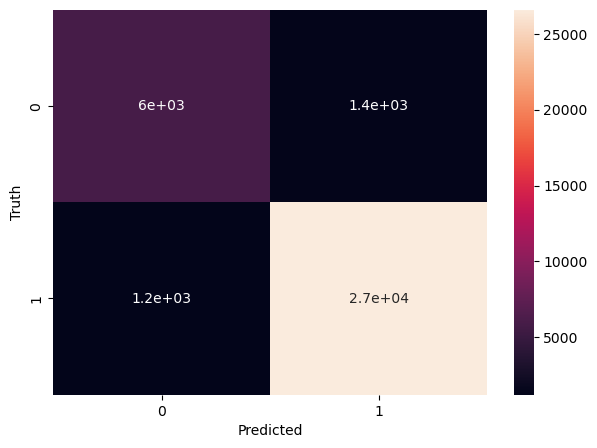

In [95]:
#draw heatmap
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [99]:
# from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix,classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test,y_predict1)

In [100]:
cm

array([[ 5954,  1400],
       [ 1207, 26590]], dtype=int64)

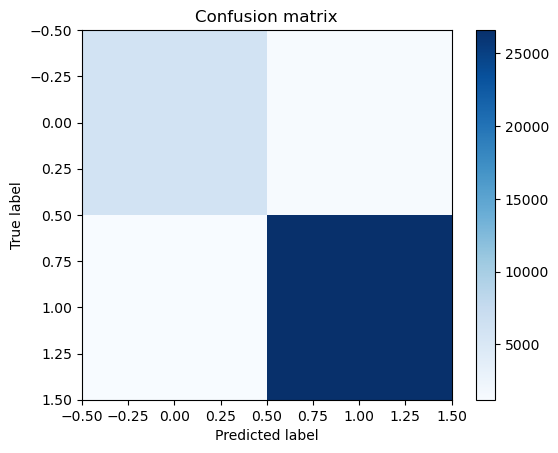

In [102]:
# plot_confusion_matrix(knn, X_test, y_test);

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predict1)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

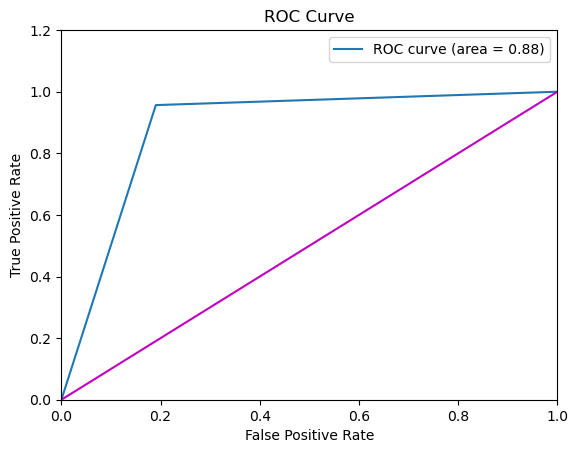

In [104]:
# ROC curve and AUC
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      7354
         1.0       0.95      0.96      0.95     27797

    accuracy                           0.93     35151
   macro avg       0.89      0.88      0.89     35151
weighted avg       0.93      0.93      0.93     35151



In [108]:
import pickle
with open('OE.pkl', 'wb') as file:
    pickle.dump(OE,file)
with open('SS.pkl', 'wb') as f:
    pickle.dump(SS,f)
with open('LR.pkl', 'wb') as f:
    pickle.dump(LR,f)
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
with open('clf.pkl', 'wb') as f:
    pickle.dump(clf,f)